In [1]:
import random, os, tqdm, time, json
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

import sys
sys.path.append("../../../")

random.seed(618)
np.random.seed(907)

new_base_path = os.path.join(
    "/Users/minkexiu/Downloads/",
    "/".join(
        os.getcwd().split("/")[-1*(len(sys.path[-1].split("/")) - 1):]
    ),
)
print("storage dir:", new_base_path)
print("code dir:", os.getcwd())

## 创建文件夹。
if not os.path.exists(new_base_path):
    os.makedirs(
        new_base_path
    )
if not os.path.exists(os.path.join(new_base_path, "preprocessedData")):
    os.makedirs(
        os.path.join(new_base_path, "preprocessedData")
    )
if not os.path.exists(os.path.join(new_base_path, "originalData")):
    os.makedirs(
        os.path.join(new_base_path, "originalData")
    )
if not os.path.exists(os.path.join(new_base_path, "trained_models")):
    os.makedirs(
        os.path.join(new_base_path, "trained_models")
    )

def create_originalData_path(filename_or_path):
    return os.path.join(new_base_path, "originalData", filename_or_path)
def create_preprocessedData_path(filename_or_path):
    return os.path.join(new_base_path, "preprocessedData", filename_or_path)
def create_trained_models_path(filename_or_path):
    return os.path.join(new_base_path, "trained_models", filename_or_path)

def millisec2datetime(timestamp):
    time_local = time.localtime(timestamp/1000)
    return time.strftime("%Y-%m-%d %H:%M:%S", time_local)
    
def run_finish():
    # 假设你的字体文件是 'myfont.ttf' 并且位于当前目录下  
    font = FontProperties(fname="/Users/minkexiu/Documents/GitHub/ML_Tryout/SimHei.ttf", size=24)  
    # 创建一个空白的图形  
    fig, ax = plt.subplots()  
    ax.imshow(
        plt.imread("/Users/minkexiu/Downloads/wallhaven-dgxpyg.jpg")
    )
    # 在图形中添加文字  
    ax.text(
        ax.get_xlim()[1] * 0.5, 
        ax.get_ylim()[0] * 0.5, 
        f"程序于这个点跑完：\n{millisec2datetime(time.time()*1000)}", fontproperties=font, ha="center", va="center", color="red"
    )  
    # 设置图形的布局  
    # ax.set_xlim(0, 1)  
    # ax.set_ylim(0, 1)  
    ax.set_xticks([])  
    ax.set_yticks([])  
    ax.patch.set_color("blue")
    # 显示图形  
    plt.show()
        
tqdm.tqdm.pandas() ## 引入这个，就可以在apply的时候用progress_apply了。

import IPython
def kill_current_kernel():
    '''杀死当前的kernel释放内存空间。'''
    IPython.Application.instance().kernel.do_shutdown(True) 
    
def simply_show_data(df1):
    print(df1.shape)
    display(df1.head())
    
def wait_flag(saved_flag_path, time_interval_sec=10):
    print("waiting for", saved_flag_path)
    time_count = 0
    while True:
        if os.path.exists(saved_flag_path):
            break
        time.sleep(time_interval_sec)
        time_count+=time_interval_sec
        print(time_count, end=" ")
    print("finish!!")

storage dir: /Users/minkexiu/Downloads/GitHub/ML_runCodeFromBook/大规模语言模型：从理论到实践
code dir: /Users/minkexiu/Documents/GitHub/ML_runCodeFromBook/大规模语言模型：从理论到实践


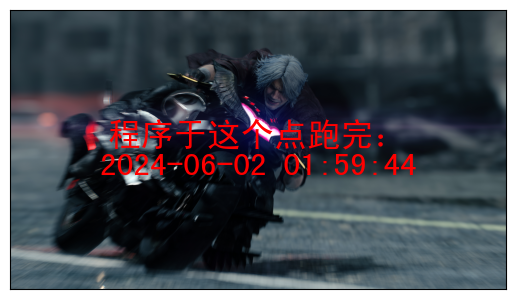

In [2]:
run_finish()

In [4]:
from transformers import AutoModelForSeq2SeqLM
from peft import get_peft_config, get_peft_model, LoraConfig, TaskType

In [5]:
model_name_or_path = "bigscience/mt0-large"
tokenizer_name_or_path = create_originalData_path(model_name_or_path) # "bigscience/mt0-large"

In [8]:
LoraConfig?

Init signature:
LoraConfig(
    peft_type: Union[str, peft.utils.peft_types.PeftType, NoneType] = None,
    auto_mapping: Optional[dict] = None,
    base_model_name_or_path: Optional[str] = None,
    revision: Optional[str] = None,
    task_type: Union[str, peft.utils.peft_types.TaskType, NoneType] = None,
    inference_mode: bool = False,
    r: 'int' = 8,
    target_modules: 'Optional[Union[list[str], str]]' = None,
    lora_alpha: 'int' = 8,
    lora_dropout: 'float' = 0.0,
    fan_in_fan_out: 'bool' = False,
    bias: "Literal['none', 'all', 'lora_only']" = 'none',
    use_rslora: 'bool' = False,
    modules_to_save: 'Optional[list[str]]' = None,
    init_lora_weights: "bool | Literal['gaussian', 'pissa', 'pissa_niter_[number of iters]', 'loftq']" = True,
    layers_to_transform: 'Optional[Union[list[int], int]]' = None,
    layers_pattern: 'Optional[Union[list[str], str]]' = None,
    rank_pattern: 'Optional[dict]' = <factory>,
    alpha_pattern: 'Optional[dict]' = <factory>,
    

In [9]:
peft_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM, 
    inference_mode=False, 
    r=8, 
    lora_alpha=32, 
    lora_dropout=0.1
)

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name_or_path)
model = get_peft_model(model, peft_config)